In [1]:
import glob
import os
import librosa
import librosa.display
import numpy as np
import soundfile
import time
import IPython.display as ipd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
def extract_feature(file_name):
    X, sample_rate = soundfile.read(file_name, dtype='float32')
    if X.ndim > 1:
        X = X[:,0]
    X = X.T

    # short term fourier transform
    stft = np.abs(librosa.stft(X))

    # mfcc
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # melspectrogram
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

In [4]:
def extract_mfcc(file_name):
    X, sample_rate = soundfile.read(file_name, dtype='float32')
    if X.ndim > 1:
        X = X[:,0]
    X = X.T

    # short term fourier transform
    stft = np.abs(librosa.stft(X))

    # mfcc
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    
    return mfccs

In [5]:
def extract_mel_spectrogram(file_name):
    signal, sample_rate = soundfile.read(file_name, dtype='float32')

    mel=librosa.feature.melspectrogram(y=signal, sr=sample_rate).T[:1280,]
    
    return mel

In [5]:
def parse_audio_files(parent_dir,sub_dirs,file_ext='*.ogg'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            try:
                mfccs, chroma, mel, contrast,tonnetz = extract_mel_spectrogram(fn)
            except Exception as e:
                print("[Error] extract feature error. %s" % (e))
                continue
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            labels = np.append(labels, label)
        print("extract %s features done" % (sub_dir))
    return np.array(features), np.array(labels, dtype = np.int)

In [8]:
    start=time.time()
    print("Extracting Features...")
    r = os.listdir("genres/")
    r.sort()
    features, labels = parse_audio_files('genres', r, '*.au')
    np.save('data/mfccs.npy', features)
    np.save('data/label.npy', labels)
    end=time.time()
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Extracting Features...
extract blues features done
extract classical features done
extract country features done
extract disco features done
extract hiphop features done
extract jazz features done
extract metal features done
extract pop features done
extract reggae features done
extract rock features done
00:53:51.27


# Reggae

Text(0.5,1,'Mel-spectrogram')

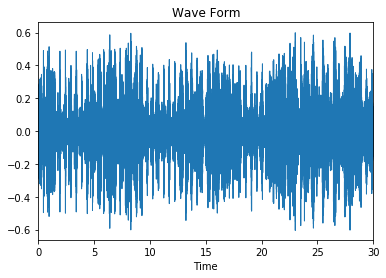

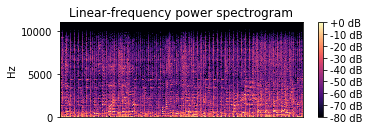

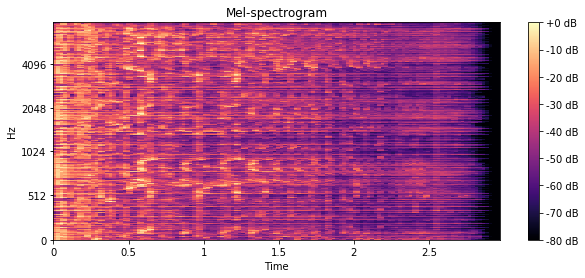

In [6]:
fn='test/Reggae.au'
name=os.path.basename(fn)
name=os.path.splitext(name)[0]
mel=extract_mel_spectrogram(fn)

y,sr=librosa.load(fn)
title='# '+name
printmd(title)

librosa.display.waveplot(y, sr=sr)
plt.title('Wave Form')

plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')



In [6]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

# numerical processing and scientific libraries
import numpy as np
import scipy

# signal processing
from scipy.io                     import wavfile
from scipy                        import stats, signal
from scipy.fftpack                import fft
from scipy.signal                 import lfilter, hamming
from scipy.fftpack.realtransforms import dct
# from scikits.talkbox              import segment_axis
# from scikits.talkbox.features     import mfcc

# general purpose
import collections

# plotting
import matplotlib.pyplot as plt
from numpy.lib                    import stride_tricks

from IPython.display              import HTML
from base64                       import b64encode

# Classification and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/home/willy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
